In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [5]:

from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = '45085ca483af4ca8b6ae8025c9abcf5f'

In [21]:
celebrity_types = 'Hilary Duff','Victoria Pedretti','Kiernan Shipka','McKenna Grace','Rachel Bilson','Kaia Gerber','Bryce Dallas Howard','Jessica Chastain','Rob Lowe','Ian Somerhalder','Sarah Hyland','Mila Kunis','Zooey Deschanel','Katy perry','Stephen Colbert','Bob Saget','Helen Mirren','Jennifer lawrence','Selma Blair','Kris Jenner','Amber Heard','Scarlett Jhohanssn','Natalie Portman','Keira Knightly','Margot Robbie','Jaime Pressly','Dax Shepard','Zack Braff','Angelina Jolie','Magen Fox'
path = Path('doppelganger')


4240

In [23]:
if not path.exists():
    path.mkdir()
    for o in celebrity_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('content_url'))

In [24]:
fns = get_image_files(path)
fns
len(fns)

4240

In [25]:
failed = verify_images(fns)
failed

(#0) []

In [19]:
failed.map(Path.unlink);
len(fns)

4240

In [26]:
doppelganger = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [27]:
dls = doppelganger.dataloaders(path)

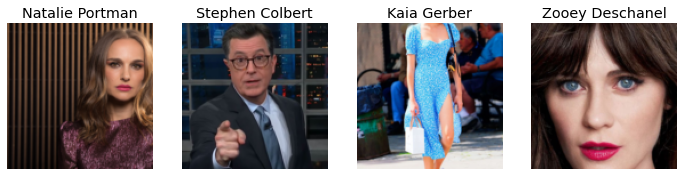

In [28]:
dls.valid.show_batch(max_n=4, nrows=1)

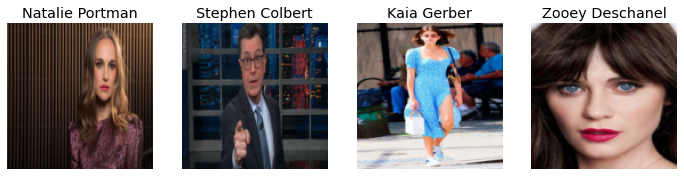

In [31]:
doppelganger = doppelganger.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = doppelganger.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

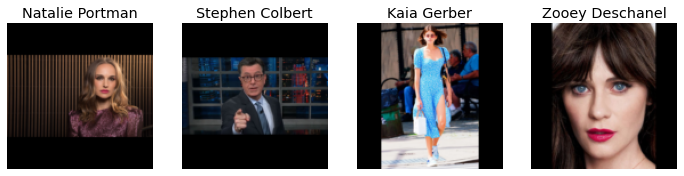

In [29]:
doppelganger = doppelganger.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = doppelganger.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

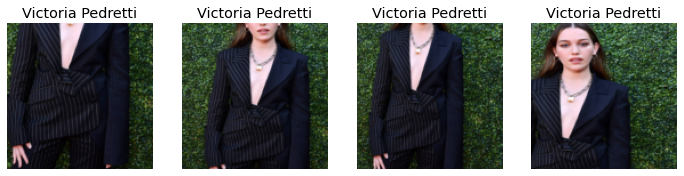

In [30]:
doppelganger = doppelganger.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = doppelganger.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

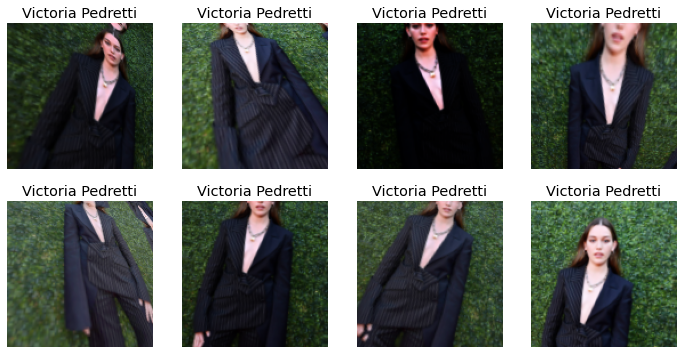

In [32]:
doppelganger = doppelganger.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = doppelganger.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [33]:
doppelganger = doppelganger.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = doppelganger.dataloaders(path, bs=64)

In [34]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.256403,1.992904,0.535377,01:15


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.800100,1.304009,0.373821,01:17
1,1.360380,1.071138,0.281840,01:16
2,0.926118,0.838970,0.229953,01:18
3,0.635993,0.815589,0.221698,01:17


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


AttributeError: 'NoneType' object has no attribute 'savefig'

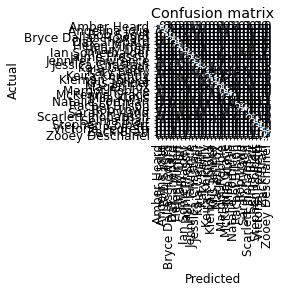

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix().savefig('filename.png')
plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['font.size']= 14

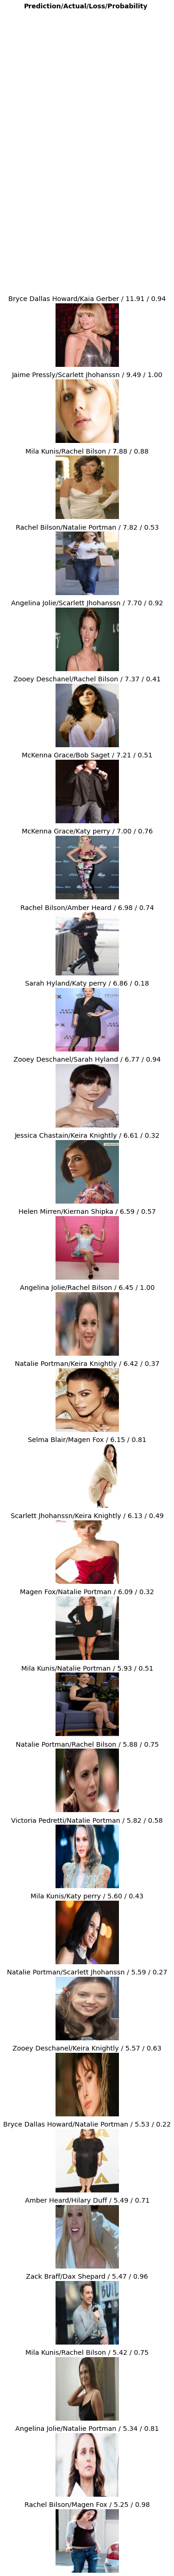

In [36]:
interp.plot_top_losses(30, nrows=30)

In [40]:
cleaner = ImageClassifierCleaner(learn, height=256, width=512, max_n=30)
cleaner

KeyboardInterrupt: 

In [38]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,celebrity_types in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/celebrity_types)
len(fns)
    

4240

In [41]:
learn.export()

In [43]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [44]:
learn_inf = load_learner(path/'export.pkl')

In [45]:
learn_inf.predict('images/Margot-Robbie.jpg')

('Margot Robbie',
 tensor(17),
 tensor([3.7694e-02, 5.9589e-03, 1.5069e-04, 5.8754e-03, 8.0092e-03, 7.7088e-05, 4.6830e-02, 5.0917e-03, 3.8935e-03, 3.2239e-03, 1.1824e-02, 7.4589e-04, 1.3697e-04, 8.8042e-03, 2.6037e-02, 8.4193e-05,
         2.2218e-03, 5.9548e-01, 6.4186e-04, 9.0509e-04, 1.4239e-02, 5.2485e-02, 2.1436e-03, 3.8463e-03, 1.5374e-01, 4.2621e-03, 7.8494e-05, 3.3649e-03, 1.3639e-03, 7.9303e-04]))

In [46]:
learn_inf.dls.vocab

(#30) ['Amber Heard','Angelina Jolie','Bob Saget','Bryce Dallas Howard','Dax Shepard','Helen Mirren','Hilary Duff','Ian Somerhalder','Jaime Pressly','Jennifer lawrence'...]

In [59]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [62]:
len(btn_upload.data)

0

In [56]:
len(btn_upload.data)
img = PILImage.create(btn_upload.data[-1])

IndexError: list index out of range

In [63]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [64]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: name 'img' is not defined

In [65]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: name 'pred' is not defined

In [66]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [67]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [68]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [69]:
Box([widgets.Label('Select your celebrity!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

Box(children=(Label(value='Select your celebrity!'), FileUpload(value={}, description='Upload'), Button(descri…

In [70]:
#hide
!pip install voila
!jupyter serverextension enable voila —sys-prefix

Enabling: voila
- Writing config: /home/jupyter/.jupyter
    - Validating...
      voila 0.1.22 OK
Enabling: —sys-prefix
- Writing config: /home/jupyter/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
